In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics

# Problem 1
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [2]:
df=pd.read_csv("cubic_zirconia.csv",index_col=[0])

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  26967 
no. of columns:  10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
df['depth'].unique()

array([62.1, 60.8, 62.2, 61.6, 60.4, 61.5, 63.7, 63.8, 60.5, 60.7, 61.1,
       66.2, 61.2, 59.8, 61.9, 60. , 62.9, 62.7, 61.7, 62.4, 61.4,  nan,
       64. , 62.3, 63. , 59.9, 62.8, 61.3, 62. , 61. , 63.9, 62.6, 62.5,
       61.8, 58. , 64.9, 60.9, 59.7, 63.2, 58.4, 59.4, 63.5, 63.1, 66.8,
       65.2, 60.6, 64.3, 60.2, 60.3, 65.5, 58.5, 68.3, 66.5, 63.3, 58.8,
       63.6, 63.4, 57.5, 59. , 58.7, 59.1, 64.1, 64.5, 64.4, 60.1, 57.6,
       70.6, 59.2, 59.3, 50.8, 58.9, 65.4, 58.6, 59.5, 56.7, 67. , 66. ,
       54.6, 59.6, 64.7, 66.9, 64.6, 64.8, 58.2, 57.9, 56.9, 66.4, 65. ,
       66.6, 57.4, 64.2, 58.1, 67.7, 55.2, 66.3, 65.3, 67.9, 67.6, 65.8,
       67.1, 65.1, 67.5, 56.6, 55.9, 57.3, 57.1, 57.8, 58.3, 65.7, 57.2,
       52.7, 56.1, 66.1, 56.3, 66.7, 54.7, 71.3, 67.3, 65.9, 71. , 57.7,
       53.4, 65.6, 56. , 68.9, 68.8, 55.3, 69.2, 53.1, 69.8, 56.5, 56.2,
       55.1, 55.5, 53.2, 56.8, 68.4, 67.8, 55.6, 67.2, 57. , 69. , 55.8,
       52.2, 53.8, 68.6, 68. , 68.7, 68.5, 70.2, 56

In [9]:
df['depth'] = df['depth'].fillna(df['depth'].mean())

In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [11]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


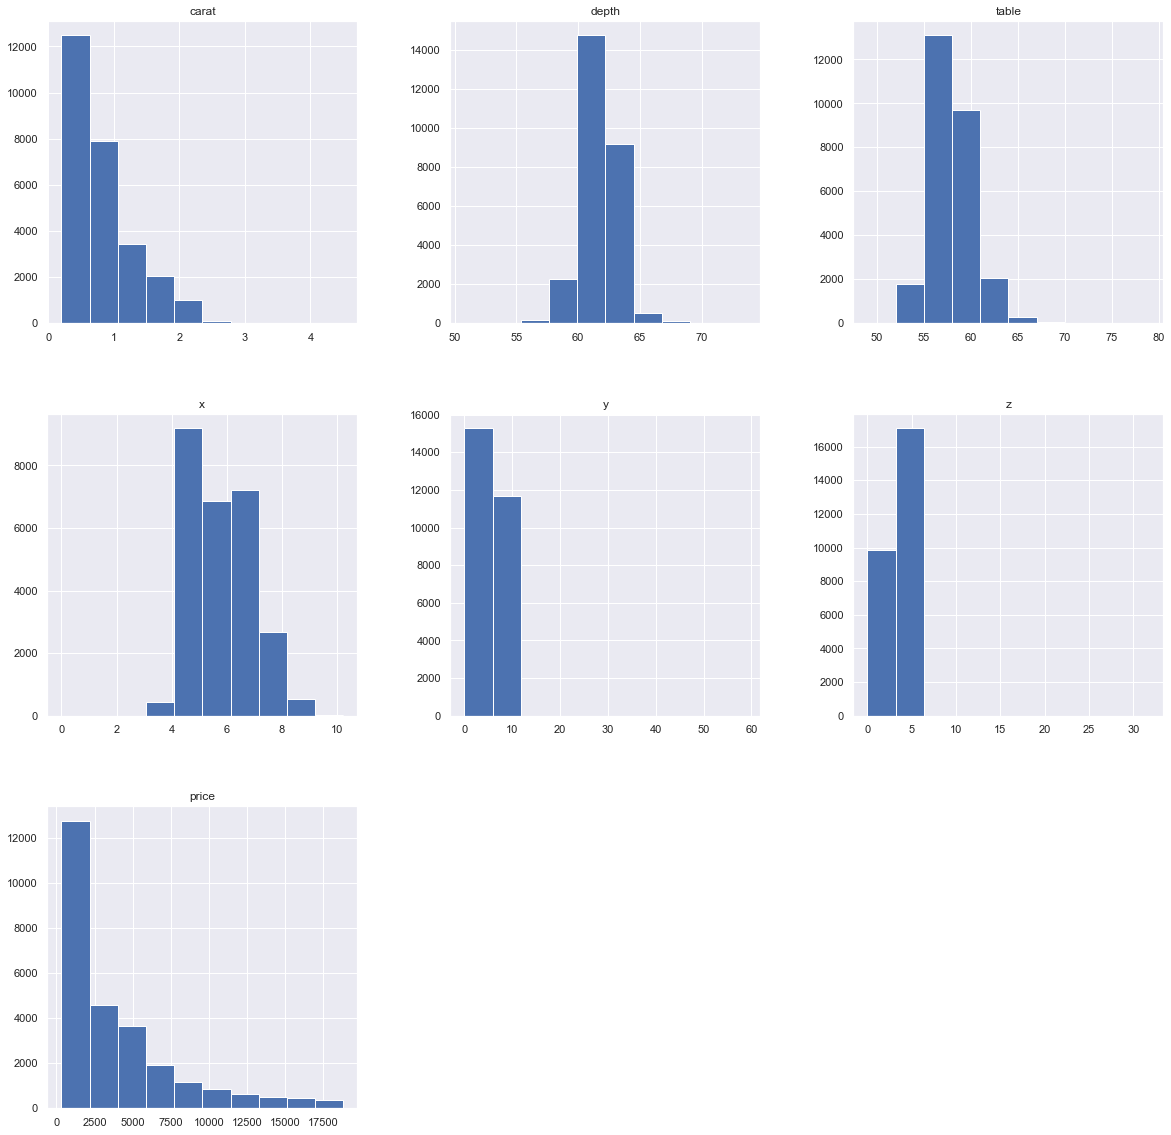

In [12]:
df.hist(figsize=(20,20))
plt.show()

In [13]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


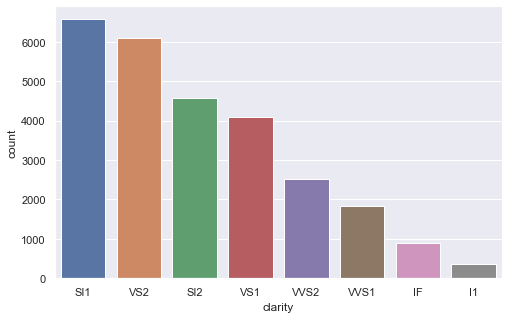

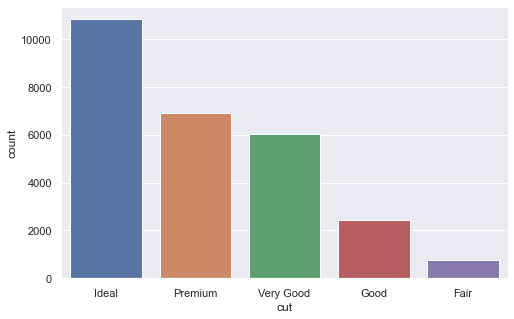

C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


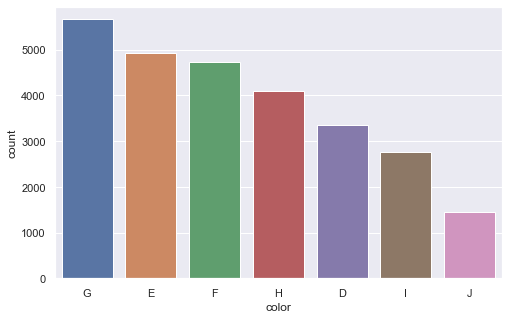

In [15]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'clarity', data = df, order = df['clarity'].value_counts().index)

plt.figure(figsize = (8,5))
sns.countplot('cut',data = df, order = df['cut'].value_counts().index)
plt.show()

plt.figure(figsize = (8,5))
sns.countplot('color',data = df, order = df['color'].value_counts().index)
plt.show()


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

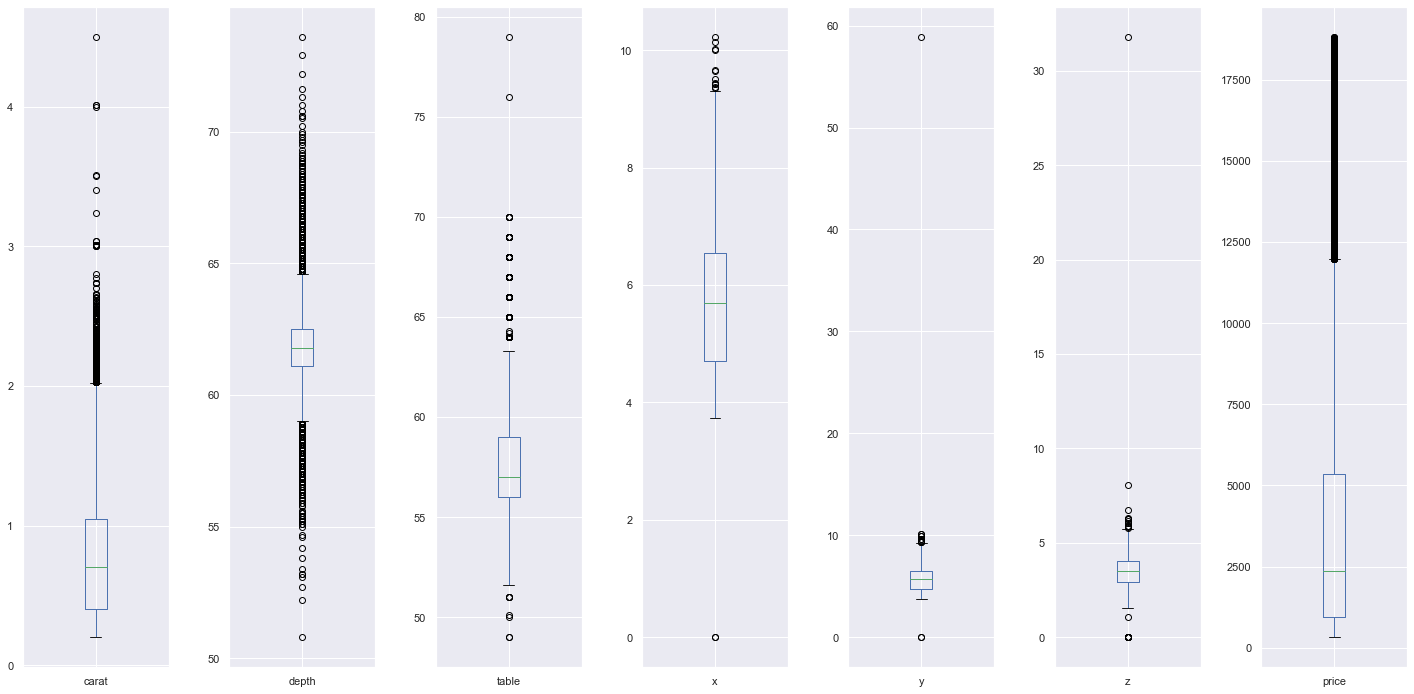

In [18]:
df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [19]:
from scipy import stats

numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols=numeric_cols.delete(-1) #Removed the target column price 


z=np.abs(stats.zscore(df[numeric_cols]))

listin= np.where(z>3)


outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )

print("replace outliers")

def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


df[numeric_cols]=df[numeric_cols].apply(outlier)
df.describe()

the number of outliers are  1624
replace outliers


,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.785614,61.741791,57.407511,5.728766,5.730705,3.536928,3937.526120
std,0.443839,1.161877,2.090057,1.123979,1.115975,0.694421,4022.551862
min,0.200000,59.000000,51.600000,3.730000,3.710000,1.530000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,2.020000,64.600000,63.300000,9.300000,9.260000,5.750000,18818.000000


C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


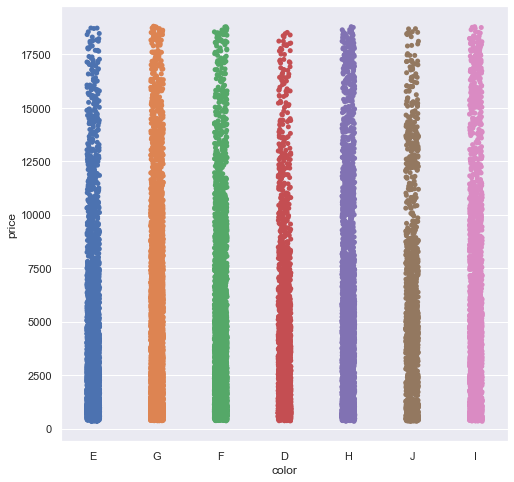

In [20]:
plt.figure(figsize=(8,8))
sns.stripplot(df["color"], df['price'], jitter=True) 
plt.show()

<Figure size 1440x720 with 0 Axes>

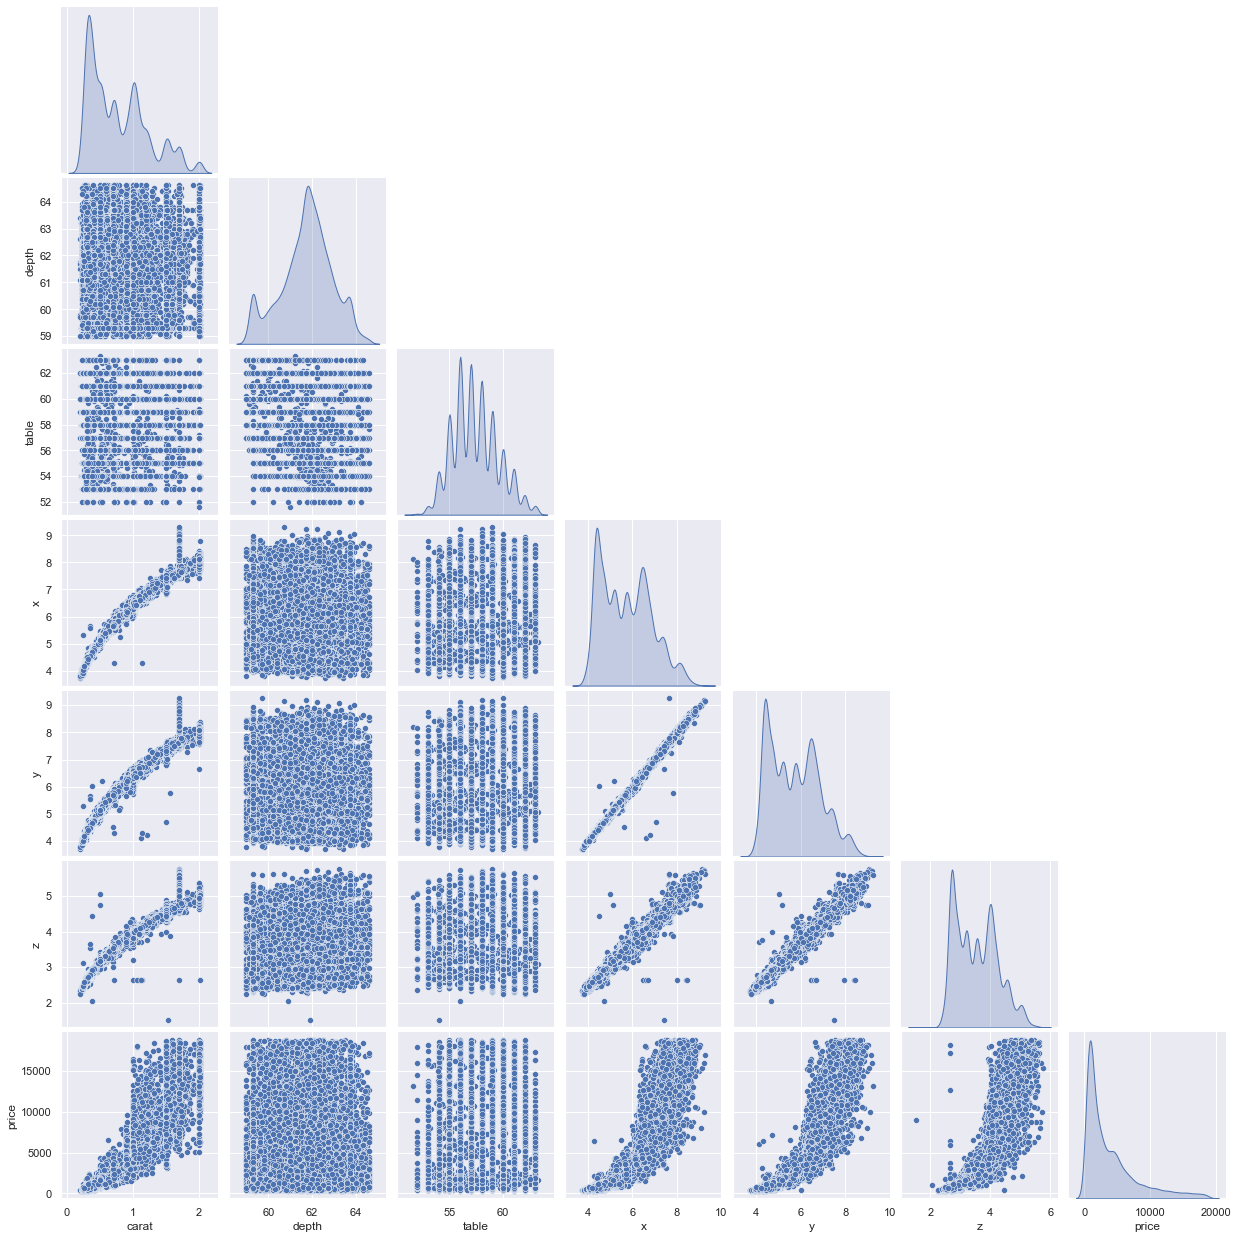

In [21]:
plt.figure(figsize = (20,10))
sns.pairplot(df, corner=True,diag_kind='kde')
plt.show()

In [22]:
corr = df.corr()
corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.025627,0.191458,0.983187,0.982311,0.980770,0.913246
depth,0.025627,1.000000,-0.285958,-0.023629,-0.026081,0.088548,-0.005797
table,0.191458,-0.285958,1.000000,0.200151,0.195044,0.162729,0.132960
x,0.983187,-0.023629,0.200151,1.000000,0.998466,0.990177,0.886937
y,0.982311,-0.026081,0.195044,0.998466,1.000000,0.989846,0.888467
z,0.980770,0.088548,0.162729,0.990177,0.989846,1.000000,0.881085
price,0.913246,-0.005797,0.132960,0.886937,0.888467,0.881085,1.000000


<AxesSubplot:>

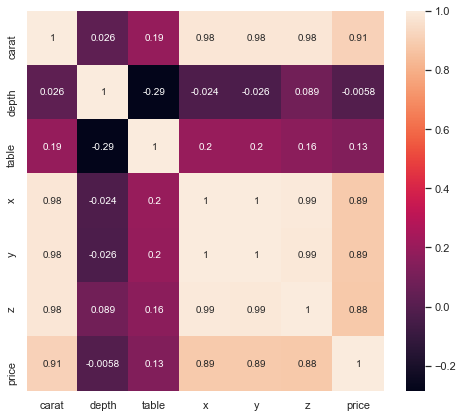

In [23]:
plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True)

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [24]:
cat

['cut', 'color', 'clarity']

In [25]:
df=pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)

In [26]:
df.head().T

,1,2,3,4,5
carat,0.30,0.33,0.90,0.42,0.31
depth,62.10,60.80,62.20,61.60,60.40
table,58.00,58.00,60.00,56.00,59.00
x,4.27,4.42,6.04,4.82,4.35
y,4.29,4.46,6.12,4.80,4.43
z,2.66,2.70,3.78,2.96,2.65
price,499.00,984.00,6289.00,1082.00,779.00
cut_Good,0.00,0.00,0.00,0.00,0.00
cut_Ideal,1.00,0.00,0.00,1.00,1.00
cut_Premium,0.00,1.00,0.00,0.00,0.00


In [27]:
X = df.drop('price', axis=1)
y = df[['price']]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [30]:
from scipy.stats import zscore

In [31]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [32]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [33]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


The coefficient for carat is 1.2684042350866556
The coefficient for depth is 0.01155431707968646
The coefficient for table is -0.015083862505010745
The coefficient for x is -0.3880807332868055
The coefficient for y is 0.3777018489734111
The coefficient for z is -0.22830304755984598
The coefficient for cut_Good is 0.03597613163086057
The coefficient for cut_Ideal is 0.11184066472756102
The coefficient for cut_Premium is 0.09360908451684923
The coefficient for cut_Very Good is 0.07609030841476025
The coefficient for color_E is -0.019371188493695082
The coefficient for color_F is -0.031699840540339336
The coefficient for color_G is -0.05375683069090857
The coefficient for color_H is -0.0878528294059885
The coefficient for color_I is -0.10522814380236525
The coefficient for color_J is -0.11563911820320966
The coefficient for clarity_IF is 0.2064769083561647
The coefficient for clarity_SI1 is 0.30417910496137324
The coefficient for clarity_SI2 is 0.19170637719774877
The coefficient for clar

In [34]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -4.692667604490466e-18


In [35]:
regression_model.score(X_train_scaled, y_train_scaled)


0.8936733283522845

In [36]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test_scaled, y_test_scaled)


0.8964592163956941

In [37]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
data_test=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22115,-1.005906,0.571097,1.246383,-1.177470,-1.160423,-1.122450,-0.312570,-0.817201,-0.589826,1.857595,...,-0.338778,-0.23592,-0.183323,-0.567366,-0.453334,-0.423665,1.861564,-0.273377,-0.323691,-0.847249
2276,-1.096250,-0.468215,-1.149994,-1.231046,-1.277312,-1.281392,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,-0.23592,-0.183323,-0.567366,-0.453334,-0.423665,1.861564,-0.273377,-0.323691,-0.770680
19184,-0.644533,0.657706,-0.191443,-0.570285,-0.611946,-0.530029,-0.312570,1.223690,-0.589826,-0.538330,...,-0.338778,-0.23592,-0.183323,1.762530,-0.453334,-0.423665,-0.537183,-0.273377,-0.323691,-0.671913
5031,0.710619,1.350581,-0.670719,0.715520,0.763742,0.886000,3.199281,-0.817201,-0.589826,-0.538330,...,-0.338778,-0.23592,-0.183323,-0.567366,2.205878,-0.423665,-0.537183,-0.273377,-0.323691,0.032671
25415,0.529932,-0.554824,2.204934,0.724449,0.682819,0.640362,-0.312570,-0.817201,1.695416,-0.538330,...,-0.338778,-0.23592,-0.183323,-0.567366,2.205878,-0.423665,-0.537183,-0.273377,-0.323691,0.030676


In [38]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [39]:
data_train.rename(columns={"cut_Good":"cut_good","cut_Ideal":"cut_ideal","cut_Premium":"cut_premium","cut_Very Good":"cut_very_good","color_E":"color_e",
                          "color_F":"color_f","color_G":"color_g","color_H":"color_h","color_I":"color_i","color_J":"color_j","clarity_IF":"clarity_if","clarity_SI1":"clarity_si1",
                          "clarity_SI2":"clarity_si2","clarity_VS1":"clarity_vs1","clarity_VS2":"clarity_vs2","clarity_VVS1":"clarity_vvs1","clarity_VVS2":"clarity_vvs2"},inplace=True)

data_test.rename(columns={"cut_Good":"cut_good","cut_Ideal":"cut_ideal","cut_Premium":"cut_premium","cut_Very Good":"cut_very_good","color_E":"color_e",
                          "color_F":"color_f","color_G":"color_g","color_H":"color_h","color_I":"color_i","color_J":"color_j","clarity_IF":"clarity_if","clarity_SI1":"clarity_si1",
                          "clarity_SI2":"clarity_si2","clarity_VS1":"clarity_vs1","clarity_VS2":"clarity_vs2","clarity_VVS1":"clarity_vvs1","clarity_VVS2":"clarity_vvs2"},inplace=True)


In [40]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_good', 'cut_ideal',
       'cut_premium', 'cut_very_good', 'color_e', 'color_f', 'color_g',
       'color_h', 'color_i', 'color_j', 'clarity_if', 'clarity_si1',
       'clarity_si2', 'clarity_vs1', 'clarity_vs2', 'clarity_vvs1',
       'clarity_vvs2', 'price'],
      dtype='object')

In [41]:
form='price ~ carat+depth+table+x+y+z+cut_good+cut_ideal+cut_premium+cut_very_good+color_e+color_f+color_g+color_h+color_i+color_j+clarity_if+clarity_si1+clarity_si2+clarity_vs1+clarity_vs2+clarity_vvs1+clarity_vvs2'

In [42]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=form , data = data_train).fit()
lm1.params

Intercept       -3.469447e-17
carat            1.268404e+00
depth            1.155432e-02
table           -1.508386e-02
x               -3.880807e-01
y                3.777018e-01
z               -2.283030e-01
cut_good         3.597613e-02
cut_ideal        1.118407e-01
cut_premium      9.360908e-02
cut_very_good    7.609031e-02
color_e         -1.937119e-02
color_f         -3.169984e-02
color_g         -5.375683e-02
color_h         -8.785283e-02
color_i         -1.052281e-01
color_j         -1.156391e-01
clarity_if       2.064769e-01
clarity_si1      3.041791e-01
clarity_si2      1.917064e-01
clarity_vs1      3.371403e-01
clarity_vs2      3.596370e-01
clarity_vvs1     2.753052e-01
clarity_vvs2     3.091819e-01
dtype: float64

In [43]:
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     6881.
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:02:55   Log-Likelihood:                -5624.2
No. Observations:               18853   AIC:                         1.130e+04
Df Residuals:                   18829   BIC:                         1.148e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.469e-17      0.002  -1.46e-14

In [44]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)


In [45]:
import math

math.sqrt(mse)

0.3217775374452135

In [46]:
regression_model.score(X_test_scaled, y_test_scaled)


0.8964592163956941

In [47]:
y_pred = regression_model.predict(X_test_scaled)


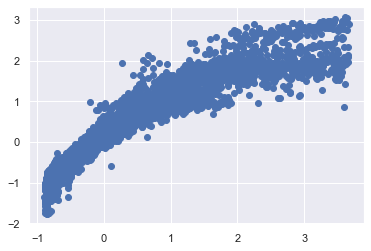

In [48]:
plt.scatter(y_test_scaled['price'], y_pred)

In [49]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,10),i),end=' ')

(-0.0) * Intercept + (1.2684042351) * carat + (0.0115543171) * depth + (-0.0150838625) * table + (-0.3880807333) * x + (0.377701849) * y + (-0.2283030476) * z + (0.0359761316) * cut_good + (0.1118406647) * cut_ideal + (0.0936090845) * cut_premium + (0.0760903084) * cut_very_good + (-0.0193711885) * color_e + (-0.0316998405) * color_f + (-0.0537568307) * color_g + (-0.0878528294) * color_h + (-0.1052281438) * color_i + (-0.1156391182) * color_j + (0.2064769084) * clarity_if + (0.304179105) * clarity_si1 + (0.1917063772) * clarity_si2 + (0.3371403082) * clarity_vs1 + (0.3596370443) * clarity_vs2 + (0.2753051696) * clarity_vvs1 + (0.3091818977) * clarity_vvs2 + 

In [50]:
from sklearn import metrics
#RMSE on Training Data
predicted_train=regression_model.predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.3260777079895458

In [51]:
#RMSE on Testing data
predicted_test=regression_model.predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))


0.3217775374452136

# Problem 2: Logistic Regression and LDA
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

2.4 Inference: Basis on these predictions, what are the insights and recommendations.



# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [53]:
data_df = pd.read_csv("Holiday_Package.csv")
data_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [54]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [55]:
data_df.describe()


,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [56]:
data_df.isna().sum()


Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [57]:
# Check for duplicate data

dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [101]:
data_df.drop('Unnamed: 0', axis=1, inplace=True)
data_df.head()

KeyError: "['Unnamed: 0'] not found in axis"

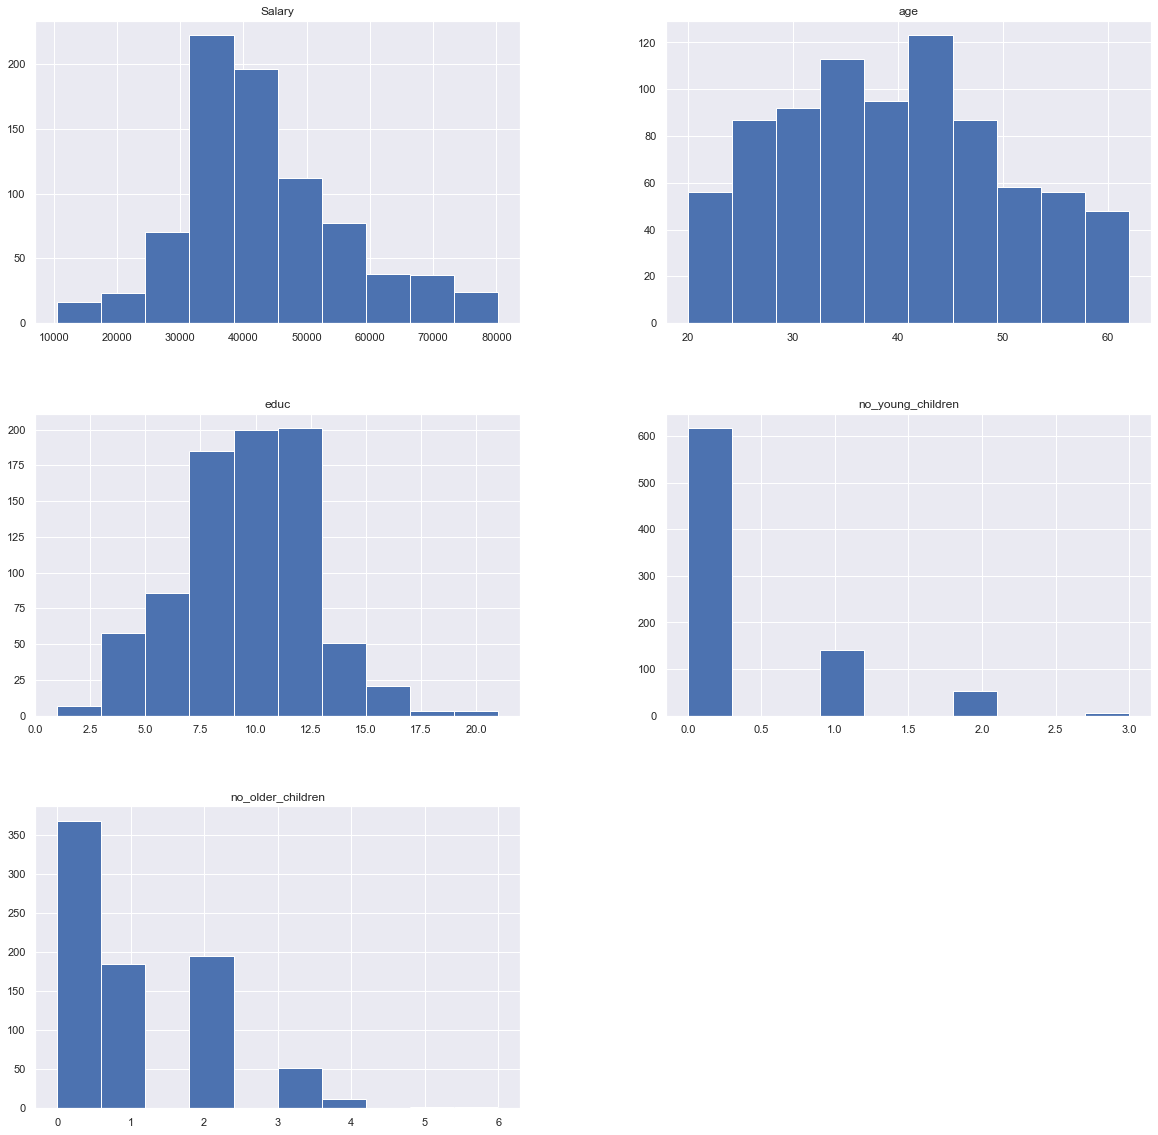

In [103]:
data_df.hist(figsize=(20,20))
plt.show()

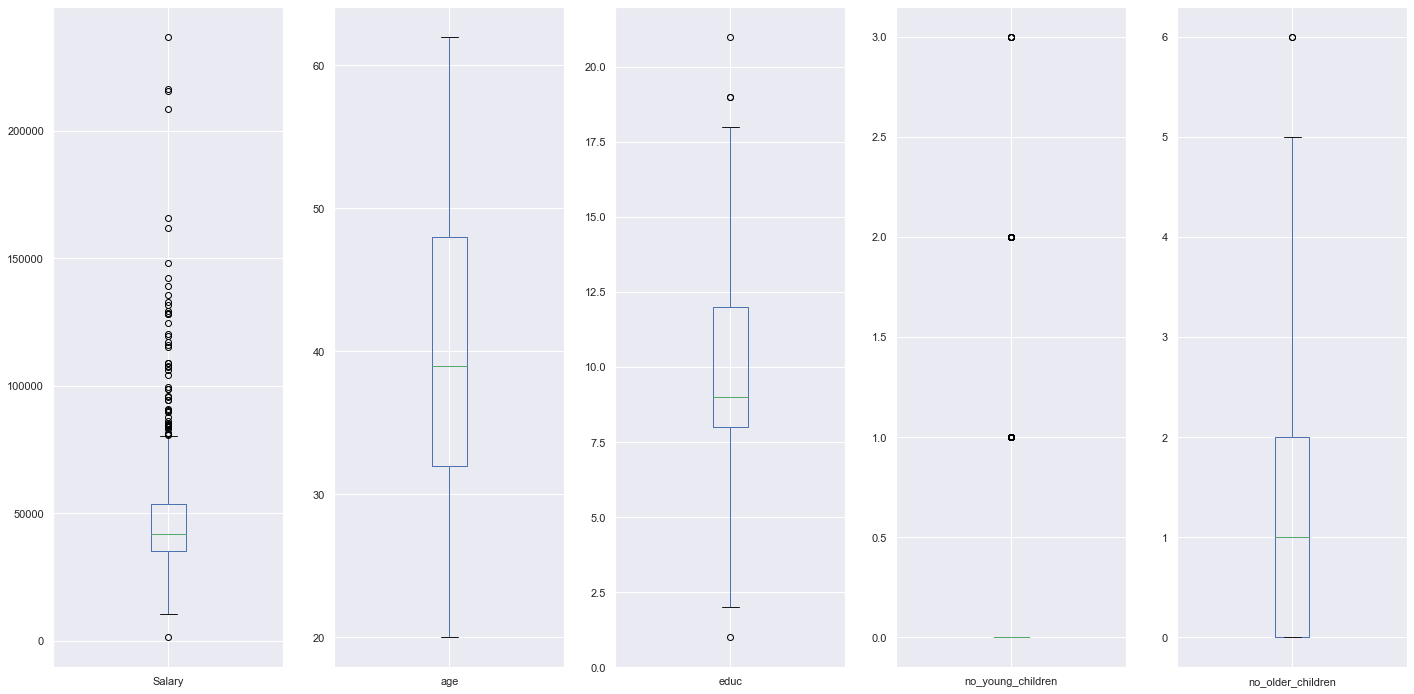

In [60]:
data_df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [61]:
numeric_cols = data_df.select_dtypes(include=[np.number]).columns

numeric_cols

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

In [64]:
from scipy import stats

z=np.abs(stats.zscore(data_df['Salary']))

listin= np.where(z>3)




outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier))

the number of outliers are  19


In [104]:
print("remove outliers")

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
lower_range, upper_range=remove_outlier(data_df['Salary'])

data_df = data_df.loc[(data_df['Salary'] > lower_range) & (data_df['Salary'] < upper_range)]

remove outliers


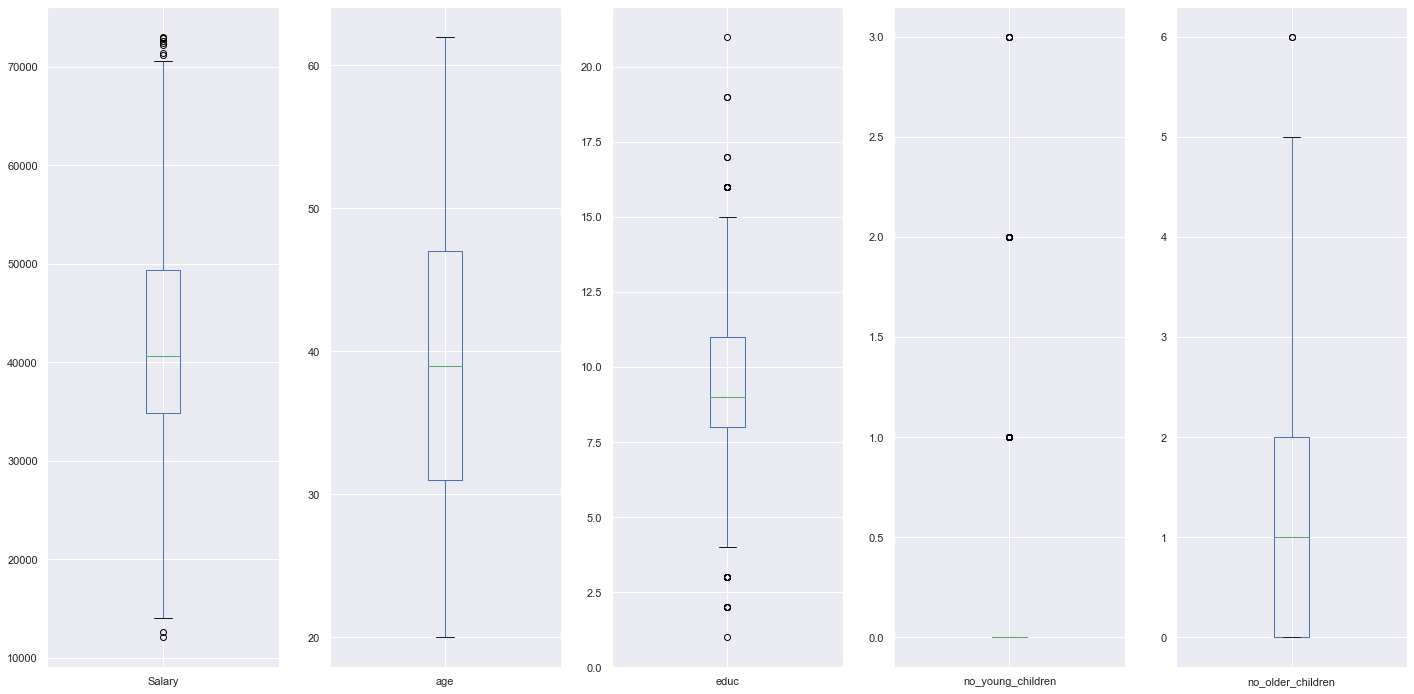

In [105]:
data_df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [67]:
print('no_young_children')
data_df['no_young_children'].value_counts()


no_young_children


0    617
1    141
2     52
3      5
Name: no_young_children, dtype: int64

In [110]:
for column in data_df.columns:
    if data_df[column].dtype == 'object':
        print(column.upper(),': ',data_df[column].nunique())
        print(data_df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    379
no     410
Name: Holliday_Package, dtype: int64


FOREIGN :  2
1    206
0    583
Name: foreign, dtype: int64




C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


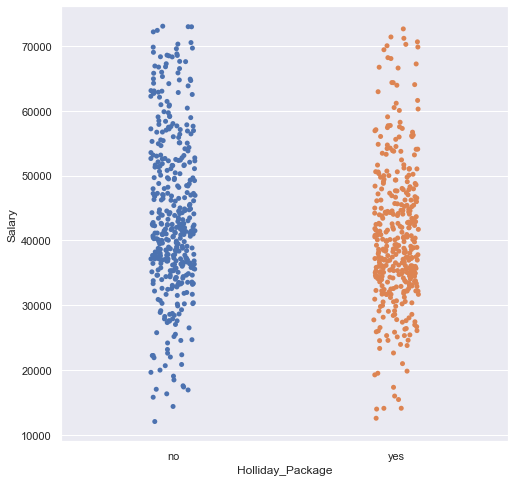

In [112]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["Holliday_Package"], data_df['Salary'], jitter=True) 
plt.show()

C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


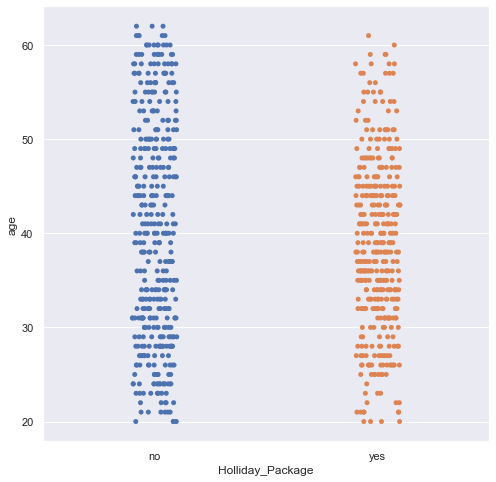

In [113]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["Holliday_Package"], data_df['age'], jitter=True) 
plt.show()

C:\Users\Adithya Manivannan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


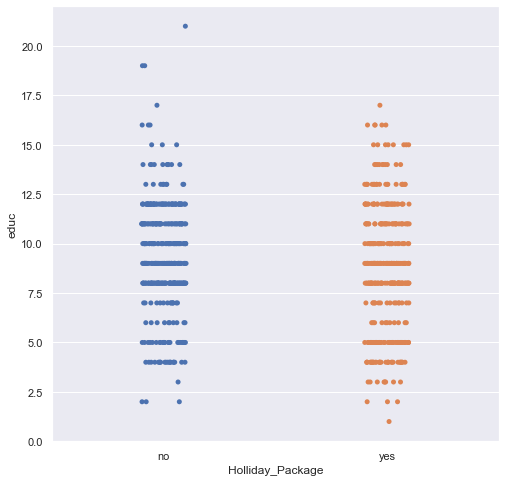

In [114]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["Holliday_Package"], data_df['educ'], jitter=True) 
plt.show()

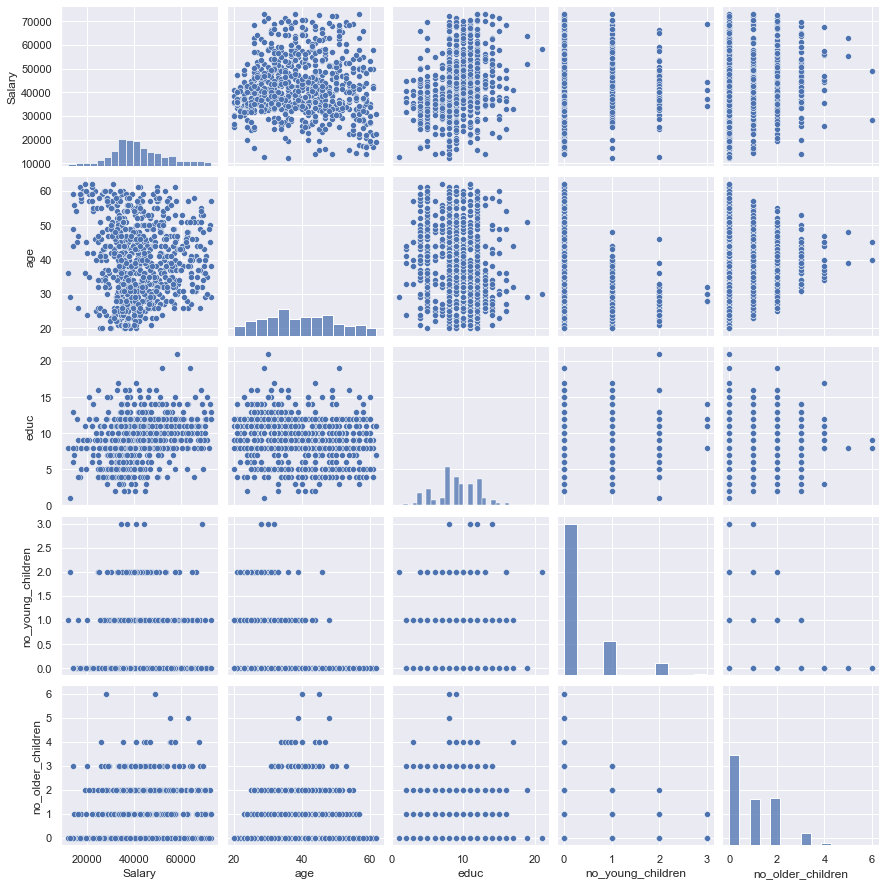

In [106]:
sns.pairplot(data_df)


<AxesSubplot:>

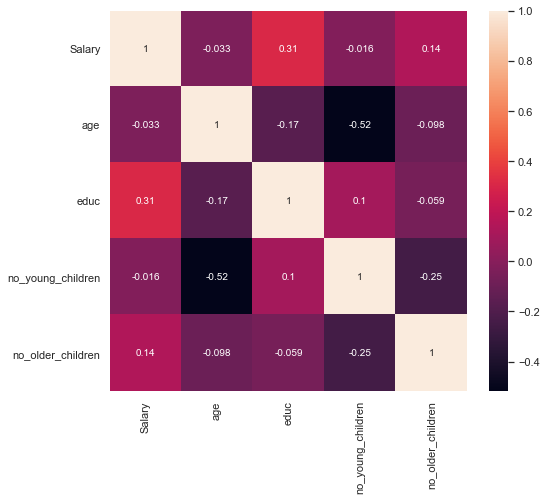

In [109]:
corr=data_df.corr()
plt.figure(figsize=(8,7))

sns.heatmap(corr,annot=True)

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [70]:
data_df['foreign']=np.where(data_df['foreign'] =='yes', '1', data_df['foreign'])
data_df['foreign']=np.where(data_df['foreign'] =='no', '0', data_df['foreign'])

In [71]:
data_df.head()


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0


In [75]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   815 non-null    object
 1   Salary             815 non-null    int64 
 2   age                815 non-null    int64 
 3   educ               815 non-null    int64 
 4   no_young_children  815 non-null    int64 
 5   no_older_children  815 non-null    int64 
 6   foreign            815 non-null    object
dtypes: int64(5), object(2)
memory usage: 50.9+ KB


In [74]:
X = np.asmatrix(data_df[['Salary','age','educ','no_young_children','no_older_children','foreign']])
Y = np.asarray(data_df['Holliday_Package'])
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.matrix

In [76]:
#logistic regression 

lgmodel = LogisticRegression(solver='liblinear')
lgmodel=lgmodel.fit(X_train, y_train)
lgmodel

LogisticRegression(solver='liblinear')

In [77]:
train_pred_lg=lgmodel.predict(X_train)
test_pred_lg =lgmodel.predict(X_test)

In [78]:
modeldf=data_df.copy()
modeldf['predict_log_class']=lgmodel.predict(X)

In [79]:
#lDA
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train, y_train)
ldamodel

LinearDiscriminantAnalysis()

In [80]:
train_pred_lda=ldamodel.predict(X_train)
test_pred_lda =ldamodel.predict(X_test)

In [81]:
modeldf['predict_LDA_class']=ldamodel.predict(X)


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Logistic regression


In [82]:
#logistic regression

print("Accuracy score  for Logistic regression  train variables ")
lgmodel_train_score = lgmodel.score(X_train, y_train)
print (lgmodel_train_score)

Accuracy score  for Logistic regression  train variables 
0.6508771929824562


In [83]:
print("Accuracy score for Logistic regression test variables ")
lgmodel_test_score = lgmodel.score(X_test, y_test)
lgmodel_test_score

Accuracy score for Logistic regression test variables 


0.6204081632653061

 confusion matrix Train variables for logistic regression 


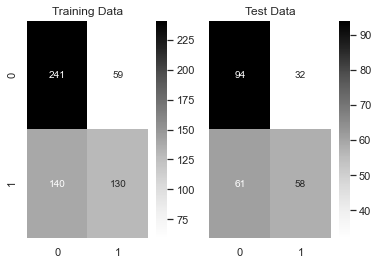

In [84]:
print(" confusion matrix Train variables for logistic regression ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap(metrics.confusion_matrix(y_train, train_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap(metrics.confusion_matrix(y_test, test_pred_lg),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [86]:
print("Logistic regression Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lg),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lg),'\n')


Logistic regression Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

          no       0.63      0.80      0.71       300
         yes       0.69      0.48      0.57       270

    accuracy                           0.65       570
   macro avg       0.66      0.64      0.64       570
weighted avg       0.66      0.65      0.64       570
 

Classification Report of the test data:

               precision    recall  f1-score   support

          no       0.61      0.75      0.67       126
         yes       0.64      0.49      0.56       119

    accuracy                           0.62       245
   macro avg       0.63      0.62      0.61       245
weighted avg       0.62      0.62      0.61       245
 



AUC and ROC FOR Logistic regression
AUC for the Training Data: 0.738
AUC for the Test Data: 0.665


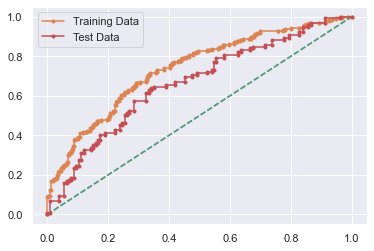

In [87]:
print("AUC and ROC FOR Logistic regression")
lg_pred_prob_train = lgmodel.predict_proba(X_train)


lg_pred_prob_test = lgmodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lg_train_auc = metrics.roc_auc_score(y_train,lg_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lg_train_auc)

#  calculate roc curve
lg_train_fpr, lg_train_tpr, thresholds = metrics.roc_curve(y_train,lg_pred_prob_train[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_train_fpr, lg_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lg_test_auc = metrics.roc_auc_score(y_test,lg_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lg_test_auc)

#  calculate roc curve
lg_test_fpr,lg_test_tpr, thresholds = metrics.roc_curve(y_test,lg_pred_prob_test[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lg_test_fpr, lg_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# LDA

In [88]:
print("Accuracy score  for LDA  train variables ")
ldamodel_train_score = ldamodel.score(X_train, y_train)
print (ldamodel_train_score)

Accuracy score  for LDA  train variables 
0.6754385964912281


In [89]:
print("Accuracy score for LDA test variables ")
ldamodel_test_score = ldamodel.score(X_test, y_test)
ldamodel_test_score


Accuracy score for LDA test variables 


0.6204081632653061

 confusion matrix Train variables for LDA 


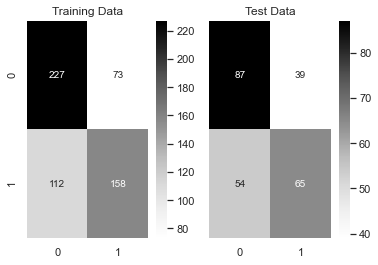

In [90]:
print(" confusion matrix Train variables for LDA ")


f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, train_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, test_pred_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [91]:
print("LDA Classfication report  ")

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,train_pred_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, test_pred_lda),'\n')

LDA Classfication report  
Classification Report of the training data:

               precision    recall  f1-score   support

          no       0.67      0.76      0.71       300
         yes       0.68      0.59      0.63       270

    accuracy                           0.68       570
   macro avg       0.68      0.67      0.67       570
weighted avg       0.68      0.68      0.67       570
 

Classification Report of the test data:

               precision    recall  f1-score   support

          no       0.62      0.69      0.65       126
         yes       0.62      0.55      0.58       119

    accuracy                           0.62       245
   macro avg       0.62      0.62      0.62       245
weighted avg       0.62      0.62      0.62       245
 



AUC and ROC FOR LDA
AUC for the Training Data: 0.743
AUC for the Test Data: 0.670


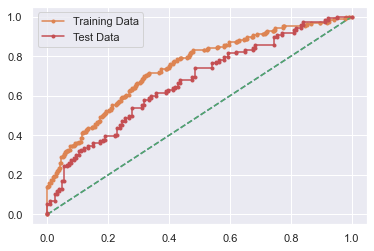

In [92]:
print("AUC and ROC FOR LDA")
lda_pred_prob_train = ldamodel.predict_proba(X_train)


lda_pred_prob_test = ldamodel.predict_proba(X_test)

# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(y_train,lda_pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,lda_pred_prob_train[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(y_test,lda_pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,lda_pred_prob_test[:,1],pos_label='yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [93]:
#compare both models 


In [94]:
cmetrics=classification_report(y_train,train_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_train_f1=round(df.loc["yes"][2],2)
lg_train_recall=round(df.loc["yes"][1],2)
lg_train_precision=round(df.loc["yes"][0],2)
df


,precision,recall,f1-score,support
no,0.632546,0.803333,0.707783,300.000000
yes,0.687831,0.481481,0.566449,270.000000
accuracy,0.650877,0.650877,0.650877,0.650877
macro avg,0.660188,0.642407,0.637116,570.000000
weighted avg,0.658733,0.650877,0.640835,570.000000


In [95]:
cmetrics=classification_report(y_test,test_pred_lg,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lg_test_f1=round(df.loc["yes"][2],2)
lg_test_recall=round(df.loc["yes"][1],2)
lg_test_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.606452,0.746032,0.669039,126.000000
yes,0.644444,0.487395,0.555024,119.000000
accuracy,0.620408,0.620408,0.620408,0.620408
macro avg,0.625448,0.616713,0.612032,245.000000
weighted avg,0.624905,0.620408,0.613660,245.000000


In [96]:
cmetrics=classification_report(y_train,train_pred_lda,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_train_f1=round(df.loc["yes"][2],2)
lda_train_recall=round(df.loc["yes"][1],2)
lda_train_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.669617,0.756667,0.710485,300.000000
yes,0.683983,0.585185,0.630739,270.000000
accuracy,0.675439,0.675439,0.675439,0.675439
macro avg,0.676800,0.670926,0.670612,570.000000
weighted avg,0.676422,0.675439,0.672710,570.000000


In [97]:
cmetrics=classification_report(y_test,test_pred_lda,output_dict=True)
df=pd.DataFrame(cmetrics).transpose()
lda_test_f1=round(df.loc["yes"][2],2)
lda_test_recall=round(df.loc["yes"][1],2)
lda_test_precision=round(df.loc["yes"][0],2)
df

,precision,recall,f1-score,support
no,0.617021,0.690476,0.651685,126.000000
yes,0.625000,0.546218,0.582960,119.000000
accuracy,0.620408,0.620408,0.620408,0.620408
macro avg,0.621011,0.618347,0.617323,245.000000
weighted avg,0.620897,0.620408,0.618304,245.000000


In [98]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic reg Train':[lgmodel_train_score,lg_train_auc,lg_train_recall,lg_train_precision,lg_train_f1],
        'Logistic reg Test':[lgmodel_test_score,lg_test_auc,lg_test_recall,lg_test_precision,lg_test_f1],
        'LDA Train':[ldamodel_train_score,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[ldamodel_test_score,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic reg Train,Logistic reg Test,LDA Train,LDA Test
Accuracy,0.65,0.62,0.68,0.62
AUC,0.74,0.67,0.74,0.67
Recall,0.48,0.49,0.59,0.55
Precision,0.69,0.64,0.68,0.62
F1 Score,0.57,0.56,0.63,0.58


ROC curve for Train data 


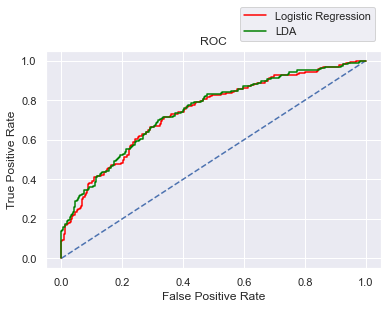

In [99]:
print("ROC curve for Train data ")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_train_fpr, lg_train_tpr,color='red',label="Logistic Regression")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC curve for Test data


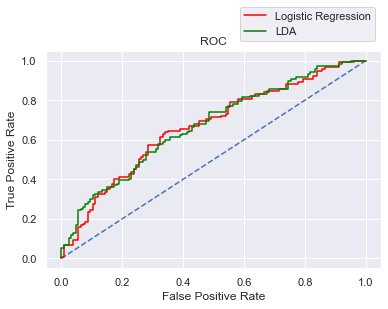

In [100]:
print("ROC curve for Test data")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lg_test_fpr, lg_test_tpr,color='red',label="Logistic Regression")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Hence, we can observe that LDA performs better in this case.
